<h1>Preliminary EDA</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from tqdm import tqdm
from glob import glob
import albumentations as A

In [2]:
INPUT_DIR = '../input'
TRAIN_IMAGES = '../input/train'
TEST_IMAGES = '../input/test'

In [3]:
os.listdir(INPUT_DIR)

['train_k.csv',
 'sample_submission.csv',
 '_annotations.csv',
 'train_annotations.csv',
 'train.csv',
 'train',
 'test']

In [4]:
train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
train_df.head()

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.26697628953273228189...               0   
1  1.2.826.0.1.3680043.8.498.46302891597398758759...               0   
2  1.2.826.0.1.3680043.8.498.23819260719748494858...               0   
3  1.2.826.0.1.3680043.8.498.68286643202323212801...               0   
4  1.2.826.0.1.3680043.8.498.10050203009225938259...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             1               0                 0   
2                 0             0               0                 0   
3                 0             0               0                 0   
4                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             1               0                 0   
1                          1             0               0                 0   
2                          0             0               0                 1   
3                          0             0               1                 0   
4                          0             0               0                 0   

   CVC - Normal  Swan Ganz Catheter Present  PatientID  
0             0                           0  ec89415d1  
1             1                           0  bf4c6da3c  
2             0                           0  3fc1c97e5  
3             0                           0  c31019814  
4             1                           0  207685cd1

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30083 entries, 0 to 30082
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StudyInstanceUID            30083 non-null  object
 1   ETT - Abnormal              30083 non-null  int64 
 2   ETT - Borderline            30083 non-null  int64 
 3   ETT - Normal                30083 non-null  int64 
 4   NGT - Abnormal              30083 non-null  int64 
 5   NGT - Borderline            30083 non-null  int64 
 6   NGT - Incompletely Imaged   30083 non-null  int64 
 7   NGT - Normal                30083 non-null  int64 
 8   CVC - Abnormal              30083 non-null  int64 
 9   CVC - Borderline            30083 non-null  int64 
 10  CVC - Normal                30083 non-null  int64 
 11  Swan Ganz Catheter Present  30083 non-null  int64 
 12  PatientID                   30083 non-null  object
dtypes: int64(11), object(2)
memory usage: 3.0+ MB


In [6]:
# How many different patients are there

train_df.PatientID.nunique()

3255

In [7]:
# How many patients and images

patient_images = train_df.groupby('PatientID', \
                                  as_index=False).agg(num_images=('StudyInstanceUID','count')).sort_values(by='num_images', ascending=False)

In [8]:
image_frequencies = patient_images.groupby('num_images').agg(frequency=('PatientID', 'count')) / len(patient_images)
image_frequencies['cum_frequency'] = image_frequencies['frequency'].cumsum()
image_frequencies.head(30)

frequency  cum_frequency
num_images                          
1            0.121966       0.121966
2            0.125038       0.247005
3            0.105684       0.352688
4            0.093395       0.446083
5            0.076190       0.522273
6            0.069124       0.591398
7            0.061137       0.652535
8            0.044240       0.696774
9            0.033487       0.730261
10           0.023963       0.754224
11           0.020584       0.774808
12           0.021505       0.796313
13           0.020584       0.816897
14           0.015361       0.832258
15           0.010445       0.842704
16           0.011060       0.853763
17           0.012596       0.866359
18           0.009524       0.875883
19           0.009524       0.885407
20           0.005530       0.890937
21           0.008602       0.899539
22           0.004916       0.904455
23           0.007066       0.911521
24           0.007066       0.918587
25           0.004301       0.922888
26           0.003994       0.926882
27           0.005837       0.932719
28           0.003072       0.935791
29           0.003994       0.939785
30           0.002765       0.942550

In [9]:
train_annotations_df = pd.read_csv(os.path.join(INPUT_DIR, 'train_annotations.csv'))
train_annotations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   StudyInstanceUID  17999 non-null  object
 1   label             17999 non-null  object
 2   data              17999 non-null  object
dtypes: object(3)
memory usage: 422.0+ KB


In [10]:
train_annotations_df.head(25)

StudyInstanceUID  \
0   1.2.826.0.1.3680043.8.498.12616281126973421762...   
1   1.2.826.0.1.3680043.8.498.12616281126973421762...   
2   1.2.826.0.1.3680043.8.498.72921907356394389969...   
3   1.2.826.0.1.3680043.8.498.11697104485452001927...   
4   1.2.826.0.1.3680043.8.498.87704688663091069148...   
5   1.2.826.0.1.3680043.8.498.87704688663091069148...   
6   1.2.826.0.1.3680043.8.498.87704688663091069148...   
7   1.2.826.0.1.3680043.8.498.53113362093090654004...   
8   1.2.826.0.1.3680043.8.498.83331936392921199432...   
9   1.2.826.0.1.3680043.8.498.83331936392921199432...   
10  1.2.826.0.1.3680043.8.498.83331936392921199432...   
11  1.2.826.0.1.3680043.8.498.21193834580880506210...   
12  1.2.826.0.1.3680043.8.498.92336648642416647037...   
13  1.2.826.0.1.3680043.8.498.10554821235548468812...   
14  1.2.826.0.1.3680043.8.498.13201061130520941008...   
15  1.2.826.0.1.3680043.8.498.32175969495085773655...   
16  1.2.826.0.1.3680043.8.498.67817181547457567521...   
17  1.2.826.0.1.3680043.8.498.34635151678243064945...   
18  1.2.826.0.1.3680043.8.498.40884867306291779816...   
19  1.2.826.0.1.3680043.8.498.59757398491099579448...   
20  1.2.826.0.1.3680043.8.498.59757398491099579448...   
21  1.2.826.0.1.3680043.8.498.59757398491099579448...   
22  1.2.826.0.1.3680043.8.498.10093202825943160056...   
23  1.2.826.0.1.3680043.8.498.75118870156895832757...   
24  1.2.826.0.1.3680043.8.498.28431016971648380368...   

                        label  \
0                CVC - Normal   
1                CVC - Normal   
2            CVC - Borderline   
3                CVC - Normal   
4                NGT - Normal   
5                CVC - Normal   
6                ETT - Normal   
7                CVC - Normal   
8                NGT - Normal   
9                CVC - Normal   
10               ETT - Normal   
11               CVC - Normal   
12               CVC - Normal   
13           CVC - Borderline   
14               CVC - Normal   
15               CVC - Normal   
16               CVC - Normal   
17               CVC - Normal   
18               CVC - Normal   
19               ETT - Normal   
20               CVC - Normal   
21  NGT - Incompletely Imaged   
22               CVC - Normal   
23               CVC - Normal   
24               CVC - Normal   

                                                 data  
0   [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1   [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2   [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3   [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4   [[1862, 14], [1845, 293], [1801, 869], [1716, ...  
5   [[906, 604], [1103, 578], [1242, 607], [1459, ...  
6   [[1781, 804], [1801, 666], [1791, 496], [1798,...  
7   [[1152, 938], [1193, 856], [1265, 795], [1362,...  
8   [[1903, 73], [1934, 768], [1917, 1061], [1866,...  
9   [[92, 1857], [163, 1936], [251, 1917], [282, 1...  
10  [[1842, 471], [1845, 307], [1856, 135], [1886,...  
11  [[8, 936], [155, 791], [319, 615], [447, 495],...  
12  [[11, 1362], [89, 1251], [192, 1149], [336, 10...  
13  [[1175, 1203], [1170, 1060], [1181, 897], [119...  
14  [[1246, 667], [1337, 608], [1462, 552], [1621,...  
15  [[1108, 1262], [1108, 1046], [1105, 831], [112...  
16  [[1182, 1062], [1351, 922], [1497, 781], [1591...  
17  [[979, 764], [979, 633], [968, 523], [965, 417...  
18  [[1285, 1083], [1318, 925], [1349, 725], [1324...  
19  [[1411, 532], [1419, 436], [1444, 344], [1478,...  
20  [[1220, 847], [1279, 764], [1352, 677], [1436,...  
21  [[1640, 2043], [1677, 1917], [1677, 1774], [15...  
22  [[1276, 1435], [1262, 1227], [1242, 1016], [12...  
23  [[1461, 1060], [1440, 929], [1413, 775], [1368...  
24  [[1440, 1397], [1440, 1242], [1440, 1120], [14...

In [11]:
sample_submission_df = pd.read_csv(os.path.join(INPUT_DIR, 'sample_submission.csv'))
sample_submission_df.head()

StudyInstanceUID  ETT - Abnormal  \
0  1.2.826.0.1.3680043.8.498.46923145579096002617...               0   
1  1.2.826.0.1.3680043.8.498.84006870182611080091...               0   
2  1.2.826.0.1.3680043.8.498.12219033294413119947...               0   
3  1.2.826.0.1.3680043.8.498.84994474380235968109...               0   
4  1.2.826.0.1.3680043.8.498.35798987793805669662...               0   

   ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
0                 0             0               0                 0   
1                 0             0               0                 0   
2                 0             0               0                 0   
3                 0             0               0                 0   
4                 0             0               0                 0   

   NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  CVC - Borderline  \
0                          0             0               0                 0   
1                          0             0               0                 0   
2                          0             0               0                 0   
3                          0             0               0                 0   
4                          0             0               0                 0   

   CVC - Normal  Swan Ganz Catheter Present  
0             0                           0  
1             0                           0  
2             0                           0  
3             0                           0  
4             0                           0

In [12]:
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3582 entries, 0 to 3581
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StudyInstanceUID            3582 non-null   object
 1   ETT - Abnormal              3582 non-null   int64 
 2   ETT - Borderline            3582 non-null   int64 
 3   ETT - Normal                3582 non-null   int64 
 4   NGT - Abnormal              3582 non-null   int64 
 5   NGT - Borderline            3582 non-null   int64 
 6   NGT - Incompletely Imaged   3582 non-null   int64 
 7   NGT - Normal                3582 non-null   int64 
 8   CVC - Abnormal              3582 non-null   int64 
 9   CVC - Borderline            3582 non-null   int64 
 10  CVC - Normal                3582 non-null   int64 
 11  Swan Ganz Catheter Present  3582 non-null   int64 
dtypes: int64(11), object(1)
memory usage: 335.9+ KB


In [15]:
print(f'There are {len(os.listdir(TRAIN_IMAGES))} train images and {len(os.listdir(TEST_IMAGES))} test images')

There are 30084 train images and 3582 test images


In [16]:
train_df.sum(axis=1)

0        1
1        3
2        1
3        1
4        1
        ..
30078    3
30079    1
30080    4
30081    1
30082    2
Length: 30083, dtype: int64

In [18]:
train_annotations = pd.read_csv(os.path.join(INPUT_DIR, 'train_annotations.csv'))
train_annotations.head(10)

StudyInstanceUID             label  \
0  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
1  1.2.826.0.1.3680043.8.498.12616281126973421762...      CVC - Normal   
2  1.2.826.0.1.3680043.8.498.72921907356394389969...  CVC - Borderline   
3  1.2.826.0.1.3680043.8.498.11697104485452001927...      CVC - Normal   
4  1.2.826.0.1.3680043.8.498.87704688663091069148...      NGT - Normal   
5  1.2.826.0.1.3680043.8.498.87704688663091069148...      CVC - Normal   
6  1.2.826.0.1.3680043.8.498.87704688663091069148...      ETT - Normal   
7  1.2.826.0.1.3680043.8.498.53113362093090654004...      CVC - Normal   
8  1.2.826.0.1.3680043.8.498.83331936392921199432...      NGT - Normal   
9  1.2.826.0.1.3680043.8.498.83331936392921199432...      CVC - Normal   

                                                data  
0  [[1487, 1279], [1477, 1168], [1472, 1052], [14...  
1  [[1328, 7], [1347, 101], [1383, 193], [1400, 2...  
2  [[801, 1207], [812, 1112], [823, 1023], [842, ...  
3  [[1366, 961], [1411, 861], [1453, 751], [1508,...  
4  [[1862, 14], [1845, 293], [1801, 869], [1716, ...  
5  [[906, 604], [1103, 578], [1242, 607], [1459, ...  
6  [[1781, 804], [1801, 666], [1791, 496], [1798,...  
7  [[1152, 938], [1193, 856], [1265, 795], [1362,...  
8  [[1903, 73], [1934, 768], [1917, 1061], [1866,...  
9  [[92, 1857], [163, 1936], [251, 1917], [282, 1...

In [20]:
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   StudyInstanceUID  17999 non-null  object
 1   label             17999 non-null  object
 2   data              17999 non-null  object
dtypes: object(3)
memory usage: 422.0+ KB


In [22]:
train_annotations.StudyInstanceUID.nunique()

9095

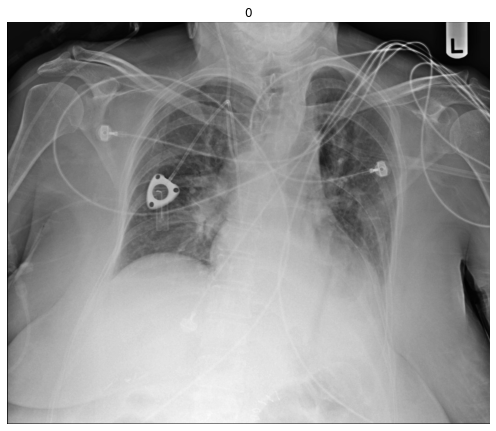

In [25]:
show_image(TRAIN_IMAGES, train_annotations, 0)

<h2>Images</h2>

In [24]:
def show_image(path, df, idx):
    file = os.path.join(path, df.loc[idx, 'StudyInstanceUID'] + '.jpg')
    image = Image.open(file)
    
    plt.figure(figsize=(7,7))
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(f'{idx}')
    plt.tight_layout()
    
def show_transformed_image(path, df, idx, rows, cols, aug):
    file = os.path.join(path, df.loc[idx, 'StudyInstanceUID'] + '.jpg')
    image = Image.open(file).convert('RGB')
    
    fig, ax = plt.subplots(rows, cols, figsize=(15,12))
    ax = ax.reshape(-1)
    
    # First, the original image
    image = np.array(image)
    ax[0].imshow(image)
    ax[0].axis('off')
    for i in range(1, rows * cols):
        augmented = aug(image=image)
        transformed = augmented['image']
        ax[i].imshow(transformed)
        ax[i].axis('off')
          
    plt.suptitle(f'{idx}')
    plt.tight_layout()
    
    

def show_images(path, df, rows, cols, suptitle=None):
    num_images = rows * cols
    
    fig, ax = plt.subplots(rows, cols, figsize=(15,12))
    ax = ax.reshape(-1)
    if suptitle is not None:
        fig.suptitle(suptitle)
        
    for i in range(num_images):
        file = os.path.join(path,df.iloc[i]['StudyInstanceUID'] + '.jpg')
        image = Image.open(file)
        ax[i].imshow(image, cmap='gray')
        title = ', '.join([c for c in df.columns if df.iloc[i][c] == 1])
        ax[i].set_title(title)
        ax[i].axis('off')
        
    plt.tight_layout()
    plt.show()

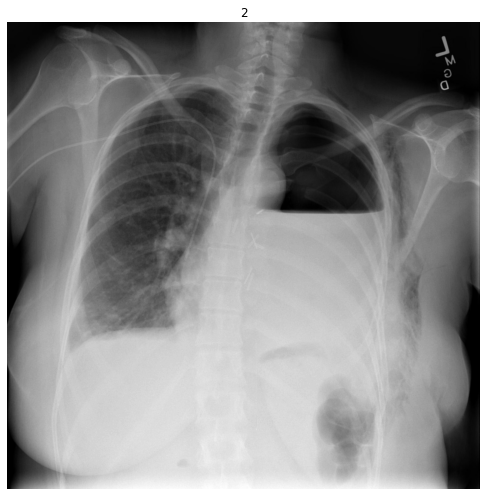

In [16]:
show_image(TRAIN_IMAGES, train_df, 2)

In [17]:
train_df.loc[2]

StudyInstanceUID              1.2.826.0.1.3680043.8.498.23819260719748494858...
ETT - Abnormal                                                                0
ETT - Borderline                                                              0
ETT - Normal                                                                  0
NGT - Abnormal                                                                0
NGT - Borderline                                                              0
NGT - Incompletely Imaged                                                     0
NGT - Normal                                                                  0
CVC - Abnormal                                                                0
CVC - Borderline                                                              1
CVC - Normal                                                                  0
Swan Ganz Catheter Present                                                    0
PatientID                               

In [18]:
train_df.loc[2, 'StudyInstanceUID']

'1.2.826.0.1.3680043.8.498.23819260719748494858948050424870692577'

In [19]:
interesting = ['76dfe347c']
patient_id = '6fc30d204'
p = train_df[train_df.PatientID == patient_id]
p

StudyInstanceUID  ETT - Abnormal  \
17653  1.2.826.0.1.3680043.8.498.18766608929740234114...               0   
19804  1.2.826.0.1.3680043.8.498.12430899959223391969...               0   
21274  1.2.826.0.1.3680043.8.498.12715526074955120054...               0   
29837  1.2.826.0.1.3680043.8.498.58945108750419950162...               0   

       ETT - Borderline  ETT - Normal  NGT - Abnormal  NGT - Borderline  \
17653                 0             0               0                 0   
19804                 0             0               0                 0   
21274                 0             0               0                 0   
29837                 0             0               0                 0   

       NGT - Incompletely Imaged  NGT - Normal  CVC - Abnormal  \
17653                          0             0               0   
19804                          0             0               0   
21274                          0             0               0   
29837                          0             0               1   

       CVC - Borderline  CVC - Normal  Swan Ganz Catheter Present  PatientID  
17653                 1             0                           0  6fc30d204  
19804                 1             1                           0  6fc30d204  
21274                 0             1                           0  6fc30d204  
29837                 0             1                           0  6fc30d204

In [20]:
train_df.columns[1:-2].values

array(['ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
       'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged',
       'NGT - Normal', 'CVC - Abnormal', 'CVC - Borderline',
       'CVC - Normal'], dtype=object)

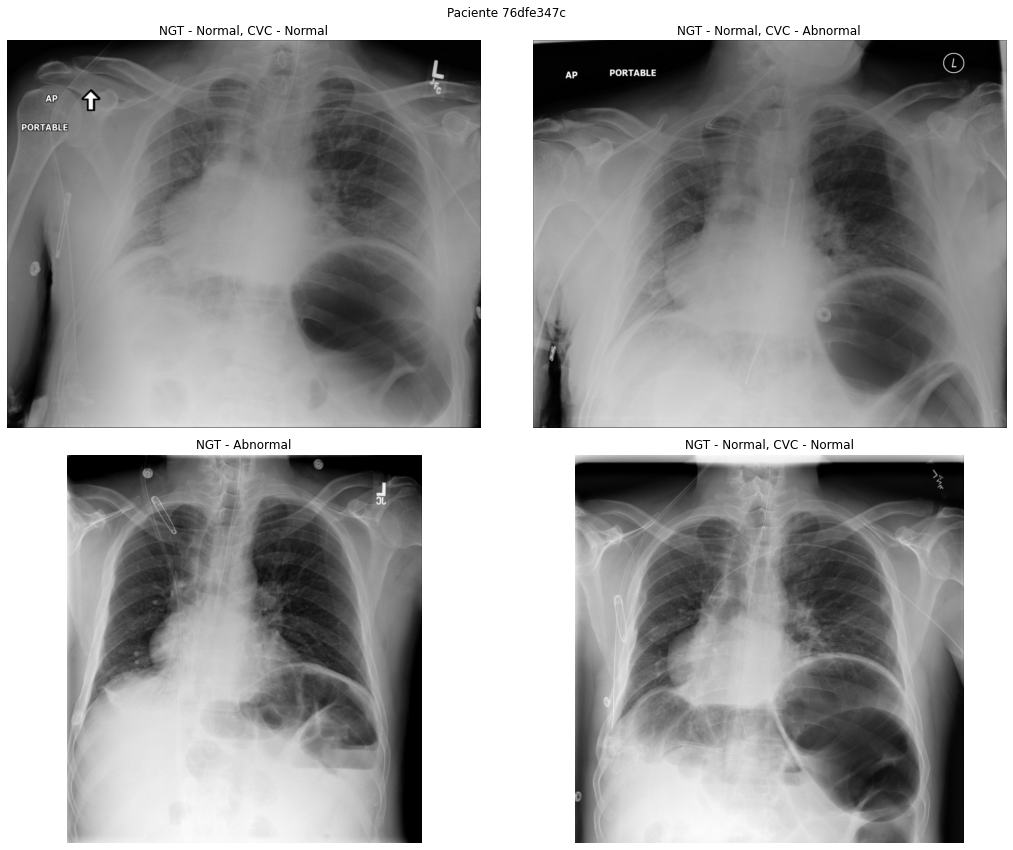

In [21]:
patient_id = '76dfe347c'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

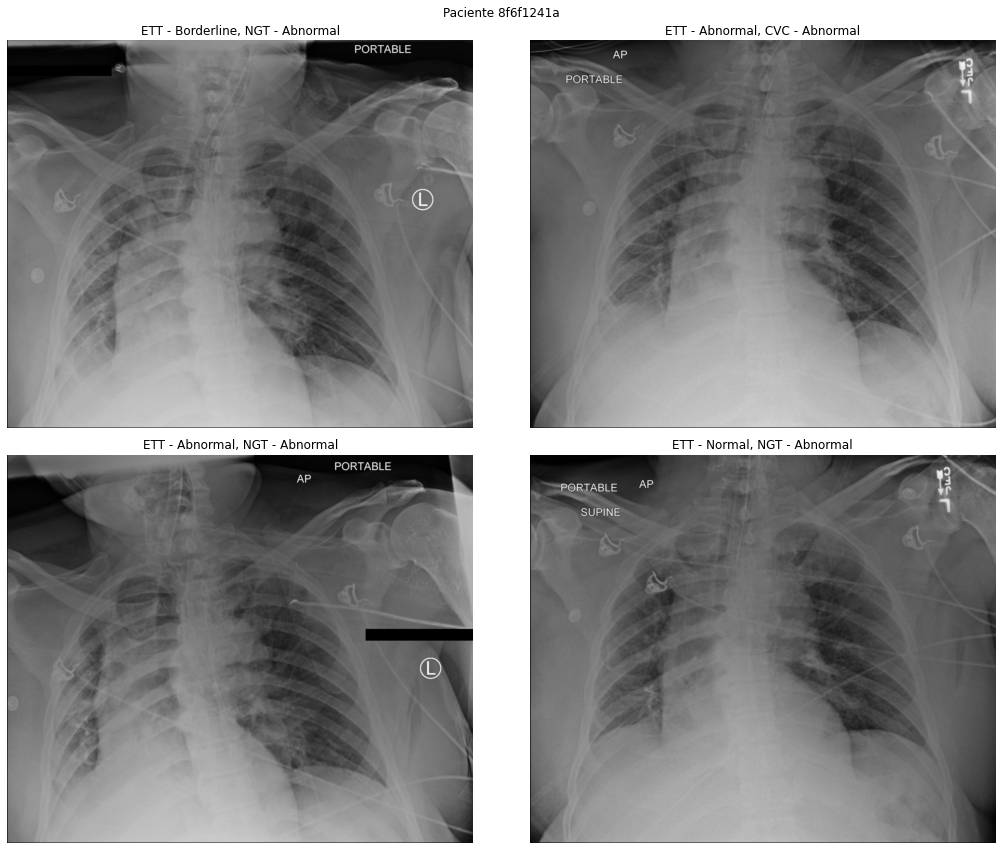

In [22]:
patient_id = '8f6f1241a'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

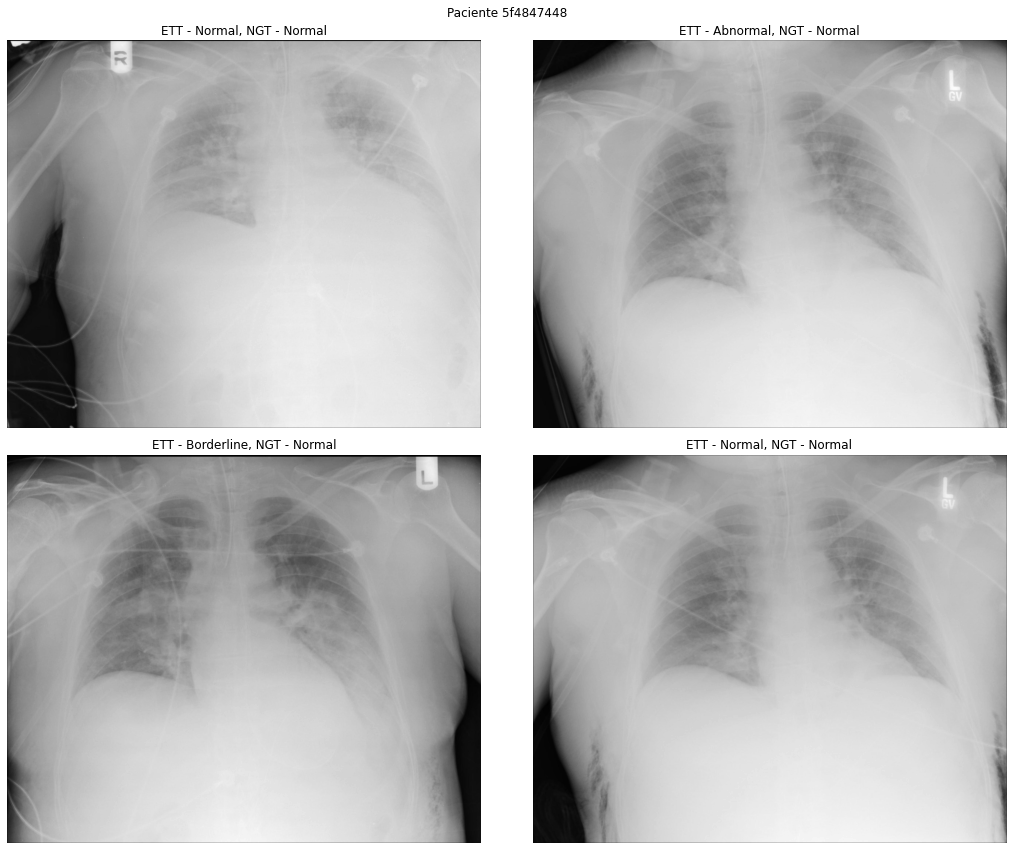

In [23]:
patient_id = '5f4847448'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

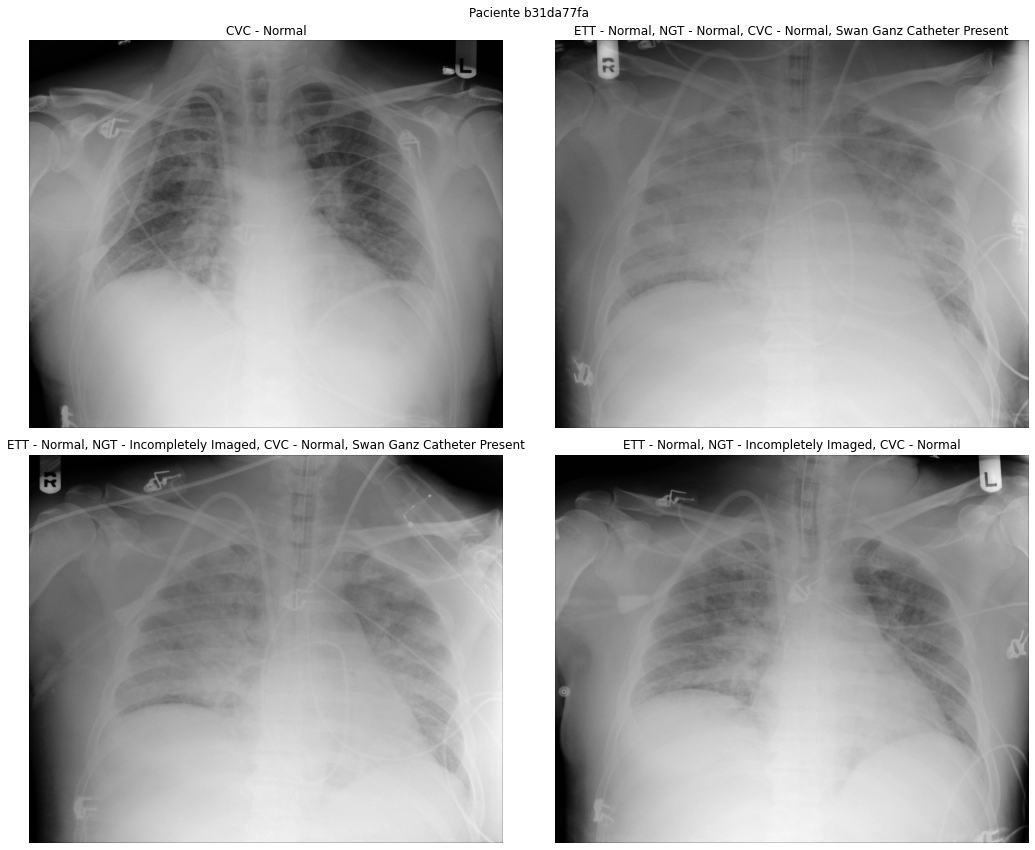

In [24]:
patient_id = 'b31da77fa'
p = train_df[train_df.PatientID == patient_id]
show_images(TRAIN_IMAGES, p, 2, 2, suptitle=f'Paciente {patient_id}')

In [25]:
diagnostic_columns = train_df.columns[1:-1]
dc = train_df[diagnostic_columns]

In [26]:
# How many images are there of every diagnostic

dc.sum()

ETT - Abnormal                   79
ETT - Borderline               1138
ETT - Normal                   7240
NGT - Abnormal                  279
NGT - Borderline                529
NGT - Incompletely Imaged      2748
NGT - Normal                   4797
CVC - Abnormal                 3195
CVC - Borderline               8460
CVC - Normal                  21324
Swan Ganz Catheter Present      830
dtype: int64

In [27]:
# Frequency of coincidence of pair diagnostic

pairs = dc.T.dot(dc) 
pairs

ETT - Abnormal  ETT - Borderline  ETT - Normal  \
ETT - Abnormal                          79                 0             0   
ETT - Borderline                         0              1138             0   
ETT - Normal                             0                 0          7240   
NGT - Abnormal                           2                32           157   
NGT - Borderline                         2                45           319   
NGT - Incompletely Imaged                7               302          2091   
NGT - Normal                            41               604          3163   
CVC - Abnormal                          11               149           746   
CVC - Borderline                        26               410          2363   
CVC - Normal                            47               740          5302   
Swan Ganz Catheter Present               7                97           558   

                            NGT - Abnormal  NGT - Borderline  \
ETT - Abnormal                           2                 2   
ETT - Borderline                        32                45   
ETT - Normal                           157               319   
NGT - Abnormal                         279                 1   
NGT - Borderline                         1               529   
NGT - Incompletely Imaged               10                 5   
NGT - Normal                             9                13   
CVC - Abnormal                          25                54   
CVC - Borderline                        88               154   
CVC - Normal                           174               370   
Swan Ganz Catheter Present              14                21   

                            NGT - Incompletely Imaged  NGT - Normal  \
ETT - Abnormal                                      7            41   
ETT - Borderline                                  302           604   
ETT - Normal                                     2091          3163   
NGT - Abnormal                                     10             9   
NGT - Borderline                                    5            13   
NGT - Incompletely Imaged                        2748             7   
NGT - Normal                                        7          4797   
CVC - Abnormal                                    280           555   
CVC - Borderline                                  916          1580   
CVC - Normal                                     2065          3393   
Swan Ganz Catheter Present                        271           356   

                            CVC - Abnormal  CVC - Borderline  CVC - Normal  \
ETT - Abnormal                          11                26            47   
ETT - Borderline                       149               410           740   
ETT - Normal                           746              2363          5302   
NGT - Abnormal                          25                88           174   
NGT - Borderline                        54               154           370   
NGT - Incompletely Imaged              280               916          2065   
NGT - Normal                           555              1580          3393   
CVC - Abnormal                        3195               381           729   
CVC - Borderline                       381              8460          2607   
CVC - Normal                           729              2607         21324   
Swan Ganz Catheter Present              37               194           795   

                            Swan Ganz Catheter Present  
ETT - Abnormal                                       7  
ETT - Borderline                                    97  
ETT - Normal                                       558  
NGT - Abnormal                                      14  
NGT - Borderline                                    21  
NGT - Incompletely Imaged                          271  
NGT - Normal                                       356  
CVC - Abnormal                                      37  
CVC - Borderline   

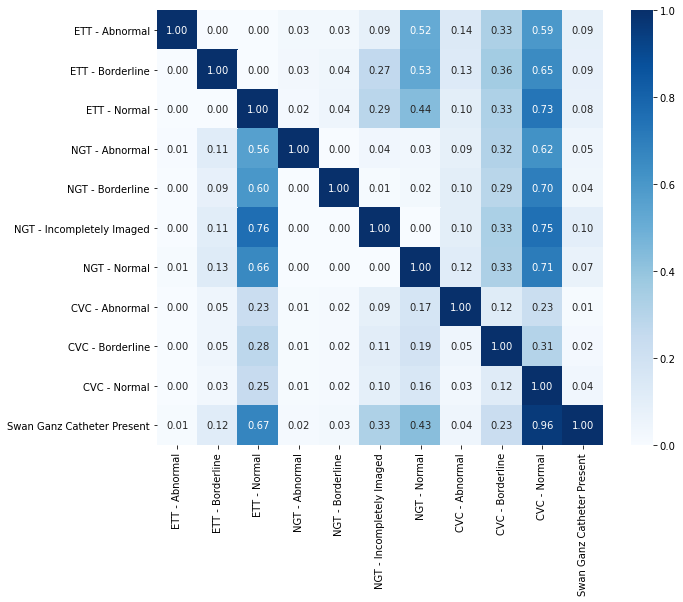

In [28]:
coincidence = pairs.div(pairs.values.diagonal(), axis=0)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(coincidence, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [29]:
dc[dc['Swan Ganz Catheter Present'] == 1].sum()

ETT - Abnormal                  7
ETT - Borderline               97
ETT - Normal                  558
NGT - Abnormal                 14
NGT - Borderline               21
NGT - Incompletely Imaged     271
NGT - Normal                  356
CVC - Abnormal                 37
CVC - Borderline              194
CVC - Normal                  795
Swan Ganz Catheter Present    830
dtype: int64

In [30]:
noe = train_df[(train_df['NGT - Abnormal'] == 1)&(train_df['NGT - Normal'] == 1)]

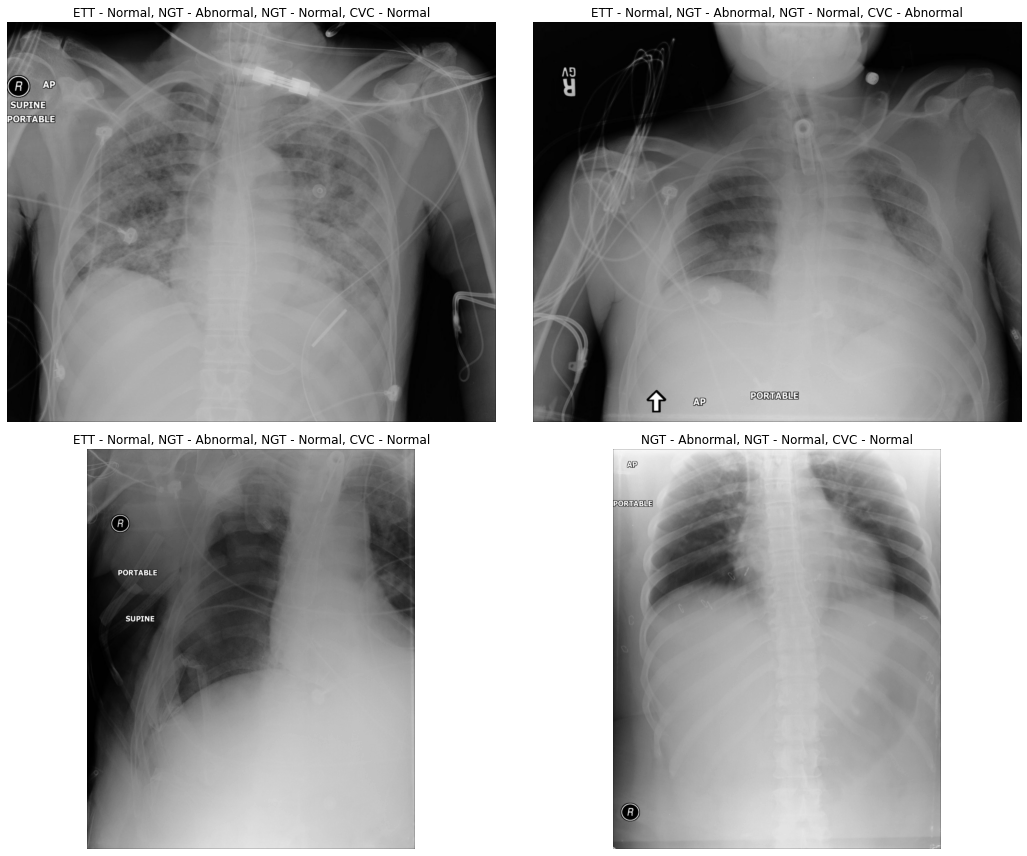

In [31]:
show_images(TRAIN_IMAGES, noe, rows=2, cols=2)

<h2>Image sizes</h2>

Let's check the different images sizes present in the training set.

In [32]:
from collections import defaultdict
import numpy as np
import cv2

In [33]:
train_images = glob(TRAIN_IMAGES + '/*.jpg')

In [34]:
import cv2

In [35]:
train_df.columns.values

array(['StudyInstanceUID', 'ETT - Abnormal', 'ETT - Borderline',
       'ETT - Normal', 'NGT - Abnormal', 'NGT - Borderline',
       'NGT - Incompletely Imaged', 'NGT - Normal', 'CVC - Abnormal',
       'CVC - Borderline', 'CVC - Normal', 'Swan Ganz Catheter Present',
       'PatientID'], dtype=object)

In [36]:
train_df.mean()

ETT - Abnormal                0.002626
ETT - Borderline              0.037829
ETT - Normal                  0.240667
NGT - Abnormal                0.009274
NGT - Borderline              0.017585
NGT - Incompletely Imaged     0.091347
NGT - Normal                  0.159459
CVC - Abnormal                0.106206
CVC - Borderline              0.281222
CVC - Normal                  0.708839
Swan Ganz Catheter Present    0.027590
dtype: float64

In [61]:
img_size = 640
p = 1
aug_1 = A.Compose([
            A.RandomResizedCrop(img_size, img_size, scale=(0.9,1), p=1),
            A.Rotate(limit=15, p=0.5),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.7),
            A.HueSaturationValue(hue_shift_limit=10, val_shift_limit=10, sat_shift_limit=10, p=0.7),
            A.CLAHE(clip_limit=(1, 4), p=0.5),
            A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                A.MedianBlur(),
            ], p=0.3),
            A.OneOf([
                A.OpticalDistortion(distort_limit=1.0),
                A.GridDistortion(num_steps=5, distort_limit=1.),
                A.ElasticTransform(alpha=3),
            ], p=0.1),
            A.OneOf([
                A.ImageCompression(),
                A.Downscale(scale_min=0.80, scale_max=0.95),
            ], p=0.2),
            A.IAAPiecewiseAffine(p=0.2),
            A.IAASharpen(p=0.2),
            A.CoarseDropout(max_height=int(img_size*0.07), max_width=int(img_size*0.07),
                            min_holes=5, max_holes=10, p=0.5)
        ])
aug_2 = A.Compose([
            A.Rotate(limit=5, p=1),
            A.RandomResizedCrop(img_size, img_size, scale=(0.9, 1), p=1),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=(-0.15,+0.25), 
                                       contrast_limit=(-0.15,+0.25), p=1),
            A.CLAHE(clip_limit=(1, 4), p=0.5),
            A.OneOf([
                A.GaussNoise(var_limit=[10, 50]),
                A.GaussianBlur(),
                A.MotionBlur(),
                A.MedianBlur(),
            ], p=1),
            A.IAASharpen(p=0.3),
            A.CoarseDropout(min_height=int(img_size*0.05), min_width=int(img_size*0.05),
                    max_height=int(img_size * 0.1), max_width=int(img_size * 0.1),
                    min_holes=1, max_holes=20, p=0)
        ])
aug_3 = A.Compose([
            A.Rotate(limit=10),
            A.RandomResizedCrop(img_size, img_size, scale=(0.95, 1.05), p=1),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.15, contrast_limit=0.15, p=0.7),
            A.CoarseDropout(min_height=int(img_size*0.05), min_width=int(img_size*0.05),
                    max_height=int(img_size * 0.1), max_width=int(img_size * 0.1),
                    min_holes=1, max_holes=10, p=0.7)
        ])


aug_test = aug = A.Compose([
            A.RandomResizedCrop(img_size, img_size, scale=(0.9, 1), p=1),
            A.ShiftScaleRotate(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.7),
            A.HueSaturationValue(hue_shift_limit=10, val_shift_limit=10, sat_shift_limit=10, p=0.7),
            A.CLAHE(clip_limit=(1, 4), p=0.5),
            A.OneOf([A.GaussNoise(var_limit=[10, 50]), A.GaussianBlur(), A.MotionBlur(), A.MedianBlur()], p=0.3),
            #A.OneOf([A.OpticalDistortion(distort_limit=1.0), A.GridDistortion(num_steps=5, distort_limit=1.),
            #         A.ElasticTransform(alpha=3)], p=0.3),
            A.OneOf([A.ImageCompression(), A.Downscale(scale_min=0.1, scale_max=0.15)], p=0.2),
            #A.IAAPiecewiseAffine(p=0.2),
            A.IAASharpen(p=0.2),
            A.CoarseDropout(max_height=int(img_size*0.1),max_width=int(img_size*0.1),min_holes=5,max_holes=10,p=0.5),
            #A.Normalize(),
            #ToTensorV2()
        ])

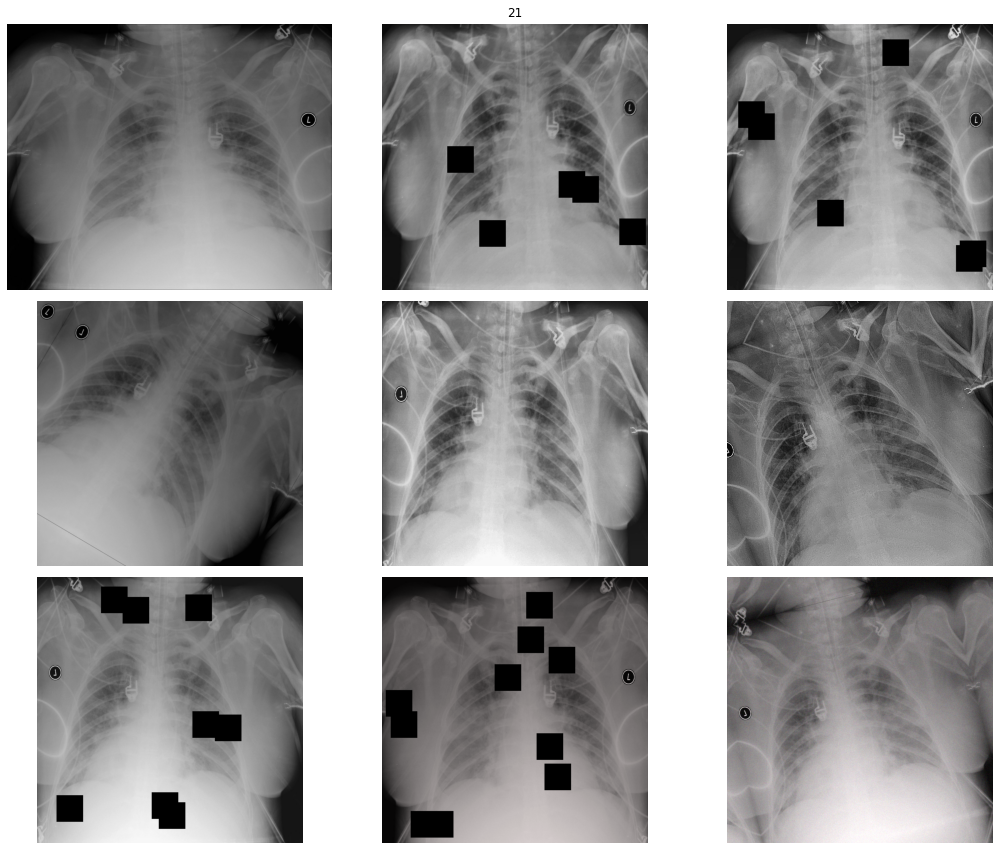

In [62]:
show_transformed_image(TRAIN_IMAGES, train_df, idx=21, rows=3, cols=3, aug=aug_test)